# Example B

In this notebook, we will generate all the figures computed in Python

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from FCS import *
from scipy.special import hyp2f1, factorial, poch

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 24})

def Fermi(ϵ, μ, T):
    return (np.exp((ϵ - μ)/T) + 1)**(-1) 

In [55]:
# ---- Define system parameters ----- #
ϵ = 21
γH, γC = 2, 2
TH, TC = 2, 1
μH, μC = 10, 20
xH, xC = (ϵ - μH)/TH, (ϵ - μC)/TC
fH, fC = Fermi(ϵ, μH, TH), Fermi(ϵ, μC, TC)

# ---- Define System operators ----- #
N = 2
c = destroy(N)
nc = c.dag()*c

# ---- Define System collapse operators ---- #
c_ops = [np.sqrt(γH * fH)*c.dag(), np.sqrt(γC * fC)*c.dag(), np.sqrt(γH * (1-fH))*c, np.sqrt(γC * (1-fC))*c]

# ---- Set Hamiltonian to identity since this is in interaction picture ---- #
H = ϵ*nc

# ---- Compute steadystate density operator and occupation---- #
ρss = steadystate(H, c_ops)

In [70]:
t0 = 0
tm = 15
dt = 0.001
t = np.arange(t0, tm, dt)

sc_ops = [np.sqrt(γH * fH)*c.dag(), np.sqrt(γH * (1-fH))*c, np.sqrt(γC * fC)*c.dag(), np.sqrt(γC * (1-fC))*c]
e_ops = [c.dag()*c]

result = photocurrent_mesolve(H, fock_dm(2,0), t, c_ops=[], sc_ops=sc_ops, e_ops=e_ops, store_measurement=True, noise=3)

Total run time:   0.24s


In [71]:
# Initial and final time to start plots from
tv0 = t0
tfi = tm

# Compute 
dNHp = np.real(result.measurement[0].T[0]*dt)
dNHm = np.real(result.measurement[0].T[1]*dt)
dNCp = np.real(result.measurement[0].T[2]*dt)
dNCm = np.real(result.measurement[0].T[3]*dt)

# Compute stochastic n
nce = result.expect[0]

# Compute hot and cold current
Ih = (np.cumsum(dNHp - dNHm)*dt)
Ic = (np.cumsum(dNCp - dNCm)*dt)

# Creat arrows
tNHp = t[dNHp==1]
tNHm = t[dNHm==1]
tNCp = t[dNCp==1]
tNCm = t[dNCm==1]

# Get list all jump times
tvs = np.sort(np.concatenate([tNHp, tNHm, tNCp, tNCm]))

# Arrow parameters
headw = 0.3
headl = 0.05
width = 0.05
length = 0.1
over = 0.5

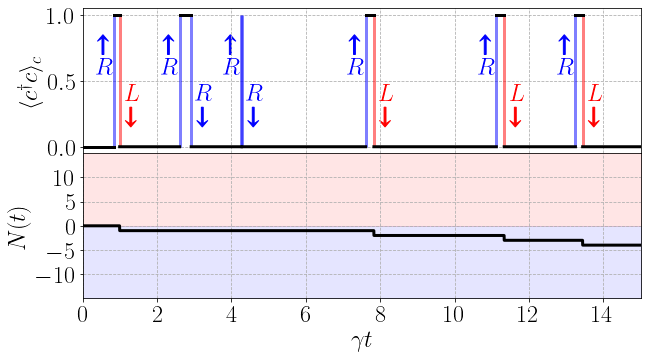

In [72]:
fig = plt.figure(figsize=(10,8))

plt.subplot(3, 1,1)
    
for i, tvi in enumerate(tvs):
    
    plt.plot(t[(tv0<t)&(t<tvi)], nce[(tv0<t)&(t<tvi)], linewidth=3, color='k', alpha=1)
    
    tv0 = tvi
    
    if tvi > tfi:
        
        break
    
    if i == len(tvs)-1:
        
        plt.plot(t[(tv0<t)&(t<tfi)], nce[(tv0<t)&(t<tfi)], linewidth=3, color='k', alpha=1)
        break
        
    
for i in range(len(tNHp)):
    
    c1 = [1, 0, 0]
    
    plt.vlines(tNHp[i], 0, 1, color=c1, linewidth=3, alpha=0.5)
    plt.arrow(tNHp[i]-0.3, 0.7, 0, length, head_width=headw, head_length=headl, width=width, color=c1, overhang=over)
    plt.text(tNHp[i]-0.45, 0.55, r'$L$', color=c1)
    
for i in range(len(tNHm)):
    
    c2 = [1, 0, 0]
    
    plt.vlines(tNHm[i], 0, 1, color=c2, linewidth=3, alpha=0.5)
    plt.arrow(tNHm[i]+0.3, 0.3, 0, -length, head_width=headw, head_length=headl, width=width, color=c2, overhang=over)
    plt.text(tNHm[i]+0.15, 0.35, r'$L$', color=c2)
    
for i in range(len(tNCp)):
    
    c3 = [0, 0, 1]
    
    plt.vlines(tNCp[i], 0, 1, color=c3, linewidth=lw, alpha=0.5)
    plt.arrow(tNCp[i]-0.3, 0.7, 0, length, head_width=headw, head_length=headl, width=width, color=c3, overhang=over)
    plt.text(tNCp[i]-0.5, 0.55, r'$R$', color=c3)
    
for i in range(len(tNCm)):
    
    c4 = [0, 0, 1]
    
    plt.vlines(tNCm[i], 0, 1, color=c4, linewidth=lw, alpha=0.5)
    plt.arrow(tNCm[i]+0.3, 0.3, 0, -length, head_width=headw, head_length=headl, width=width, color=c4, overhang=over)
    plt.text(tNCm[i]+0.1, 0.35, r'$R$', color=c4)
    
plt.grid(True, linestyle='--')

plt.yticks([0, 0.5, 1])
plt.xticks(np.arange(2, 16, 2))
plt.xlabel(r'$t$')
plt.ylabel(r'$\langle c^{\dagger}c\rangle_{c}$')
plt.xlim([0, tfi])
plt.ylim([-0.05,1.05])


plt.subplot(3, 1,2)
plt.plot(t[t<tfi], (Ih)[t<tfi]/dt, linewidth=lw, color='k', label=r'${\rm H}$')

plt.fill_between([0, tm], -15, 0, color='b', alpha=0.1)
plt.fill_between([0, tm], 0, 15, color='r', alpha=0.1)

plt.grid(True, linestyle='--')

plt.xticks(np.arange(0, 18, 2))
plt.yticks(range(-10, 15, 5))
plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$N(t)$')
plt.xlim([0, tm])
plt.ylim([-15, 15])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# Saddle Point Approximation

In [32]:
def F12(a, b, z, ncut):
    
    F = np.array([(poch(a, n)/np.prod(poch(b,n))) * (z**n / factorial(n)) for n in range(ncut)])
    
    return np.sum(F, axis=0)

def Pnt_general(gamma, n, t):
    
    # exact solution of example b using hypergeometric functions 
    gt = gamma * t
    
    A = np.exp(-gt)
    B = (gt)**(2*n) / factorial(2*n)
    C = 2 * gt * (-1)**n / ((2*n - 1)*np.pi)
    D = F12(0.5-n, [3/2, 3/2 - n], -(gt)**2/4, ncut)
    
    return A*(B - C*D)
    

def Pnt_saddle(gamma, n, t):
    
    # Approximate solution of example b using saddle point approximation
    gt = gamma * t
    
    A = (np.exp(2*n-gt)/np.sqrt(n*np.pi))
    B = (gt / (2*n))**(2*n)
    
    # Normalise function too 
    
    C = A * B
    
    return C

In [77]:
# system parameters
gamma = 1
tn = np.linspace(0, 30, 100)
n = 1
ncut = 30

In [78]:
P1tg = Pnt_general(gamma, 1, tn)
P1ts = Pnt_saddle(gamma, 1, tn)

P2tg = Pnt_general(gamma, 2, tn)
P2ts = Pnt_saddle(gamma, 2, tn)

P5tg = Pnt_general(gamma, 6, tn)
P5ts = Pnt_saddle(gamma, 6, tn)

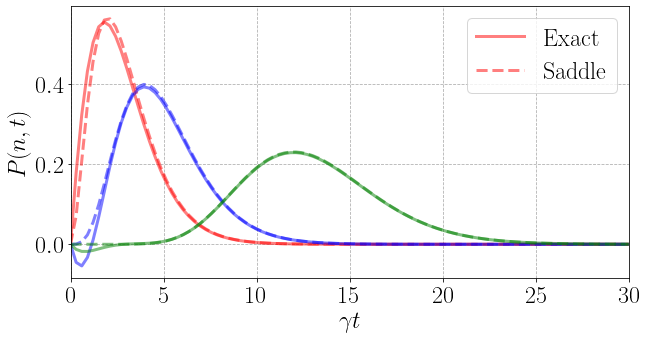

In [79]:
fig = plt.figure(figsize=(10, 5))

plt.plot(tn, P1tg, color='r', linewidth=3, label=r'${\rm Exact}$', alpha=0.5)
plt.plot(tn, P1ts, color='r', linewidth=3, linestyle='--', label=r'${\rm Saddle}$', alpha=0.5)

plt.plot(tn, P2tg, color='b', linewidth=3, alpha=0.5)
plt.plot(tn, P2ts, color='b', linewidth=3, linestyle='--', alpha=0.5)

plt.plot(tn, P5tg, color='g', linewidth=3, alpha=0.5)
plt.plot(tn, P5ts, color='g', linewidth=3, linestyle='--', alpha=0.5)

plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$P(n,t)$')

plt.xlim([tn[0], tn[-1]])
plt.grid(True, linestyle='--')
plt.legend()

plt.show()